In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as sm
sns.set(style='darkgrid')
%matplotlib inline

<h1>Summer products analysis on Wish platform</h1>

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Wish_2022.svg/640px-Wish_2022.svg.png" width="450"/>
</div>

<h2>Loading data</h2>

In [2]:
products = pd.read_csv('data/summer-products-with-rating-and-performance_2020-08.csv')
products.head()

,index,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


<h2>Description of columns</h2>

In [3]:
products.shape

(1573, 44)

In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         1573 non-null   int64  
 1   title                         1573 non-null   object 
 2   title_orig                    1573 non-null   object 
 3   price                         1573 non-null   float64
 4   retail_price                  1573 non-null   int64  
 5   currency_buyer                1573 non-null   object 
 6   units_sold                    1573 non-null   int64  
 7   uses_ad_boosts                1573 non-null   int64  
 8   rating                        1573 non-null   float64
 9   rating_count                  1573 non-null   int64  
 10  rating_five_count             1528 non-null   float64
 11  rating_four_count             1528 non-null   float64
 12  rating_three_count            1528 non-null   float64
 13  rat

In [5]:
products.isna().sum()

index                              0
title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
i

In [6]:
products.price.describe()

count    1573.000000
mean        8.325372
std         3.932030
min         1.000000
25%         5.810000
50%         8.000000
75%        11.000000
max        49.000000
Name: price, dtype: float64

/Users/miron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Price Distribution')

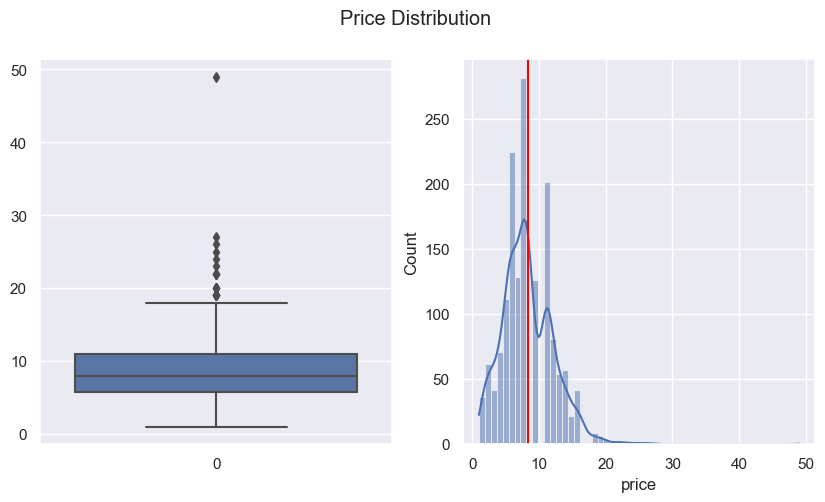

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.boxplot(products['price'], ax=axs[0])
sns.histplot(x='price', data=products, kde=True, ax=axs[1])
plt.axvline(products.price.mean(), color='red')
fig.suptitle('Price Distribution')

In [8]:
products.price.median()

8.0

In [10]:
ss.kstest(products.price, 'norm')

KstestResult(statistic=0.9524564796220687, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)

<h4>As we can see the distribution of prices isn't normal or any another well-known distribution<h4>

Text(0.5, 0.98, 'Retail Price Distribution')

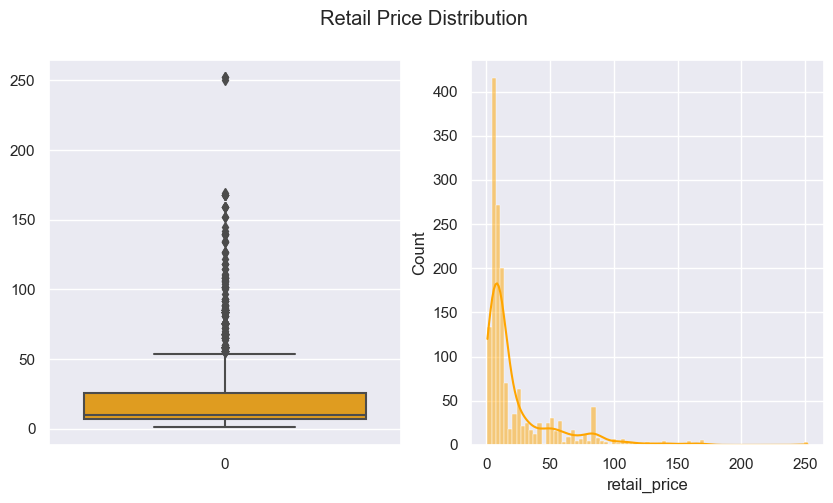

In [49]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.boxplot(products['retail_price'], ax=axs[0], color='orange')
sns.histplot(x='retail_price', data=products, kde=True, ax=axs[1], color='orange')
fig.suptitle('Retail Price Distribution')

<h3>Analyzing ratings and correlation in data<h3>

In [50]:
products.rating.describe()

count    1573.000000
mean        3.820896
std         0.515374
min         1.000000
25%         3.550000
50%         3.850000
75%         4.110000
max         5.000000
Name: rating, dtype: float64

<Axes: xlabel='rating', ylabel='Count'>

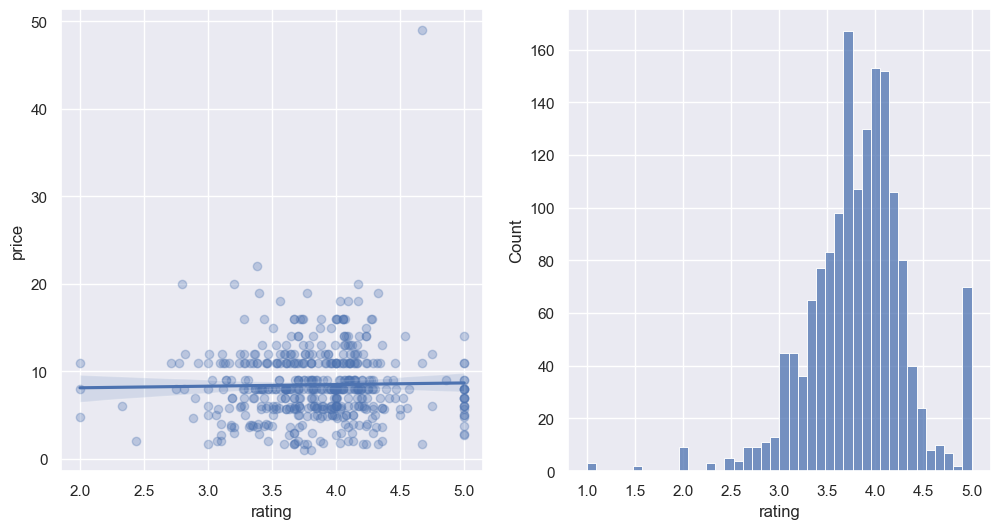

In [51]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
sns.regplot(x='rating', y='price', data=products.sample(500, replace=False), scatter_kws={'alpha':0.3}, ax=axs[0])
sns.histplot(x='rating', data=products, ax=axs[1])

In [19]:
ss.spearmanr(products.rating, products.price)

SignificanceResult(statistic=0.055563556165056996, pvalue=0.0275482369292522)

<h4>There is a statistically significant correlation between price and product but very weak<h4>

<Axes: >

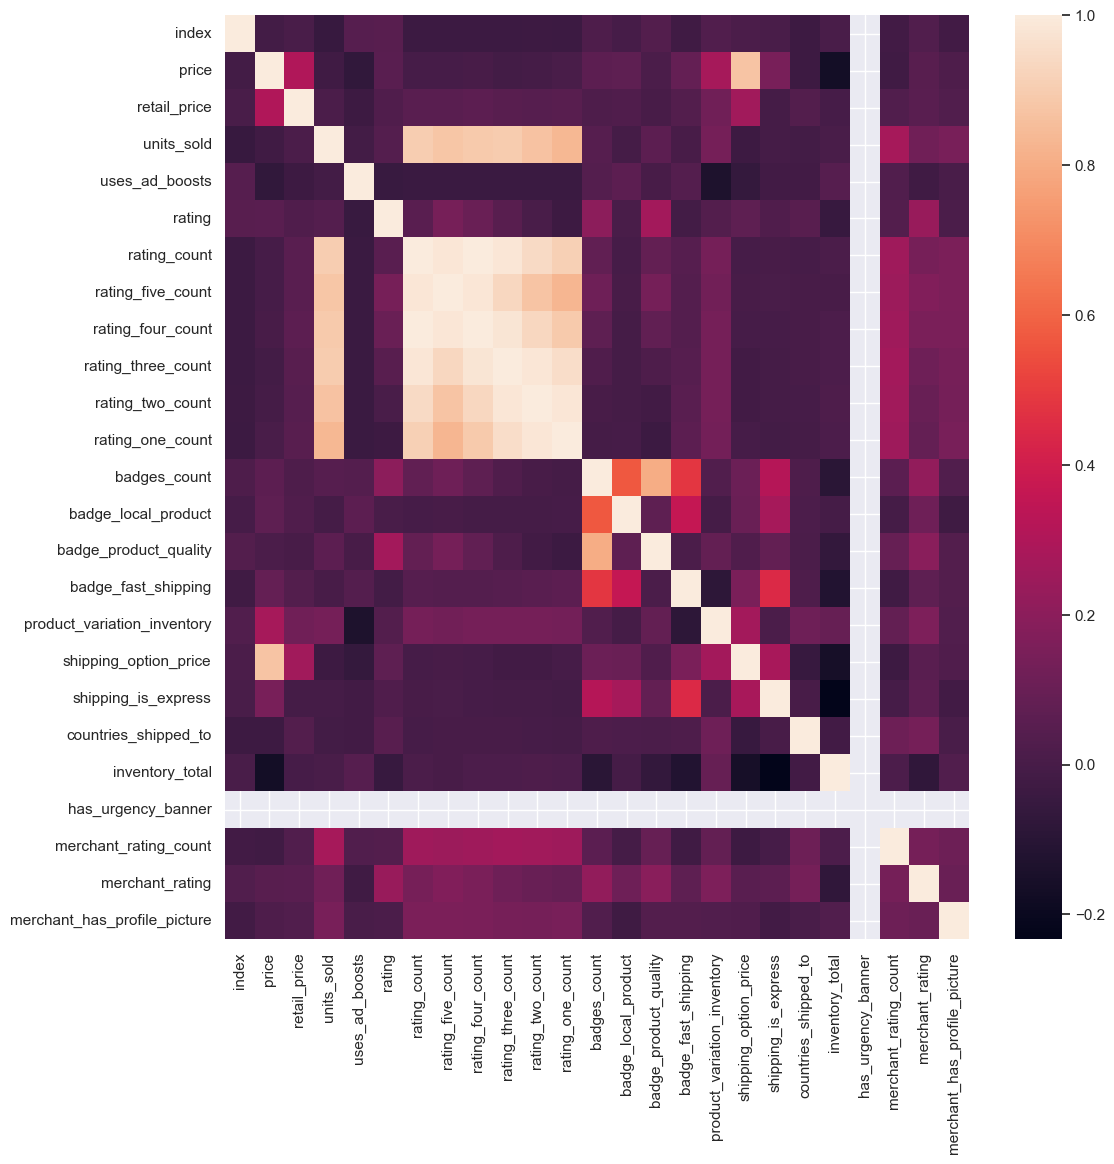

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(products.select_dtypes(include=np.number).corr())

In [53]:
products.origin_country.value_counts()

origin_country
CN    1516
US      31
VE       5
SG       2
AT       1
GB       1
Name: count, dtype: int64

<Axes: xlabel='origin_country'>

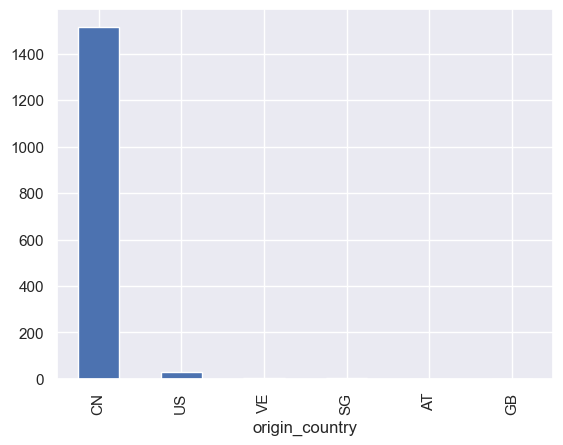

In [20]:
products.origin_country.value_counts().plot(kind='bar')

In [54]:
products.merchant_has_profile_picture.value_counts()

merchant_has_profile_picture
0    1347
1     226
Name: count, dtype: int64

Text(0.5, 0, 'Merchant has profile picture')

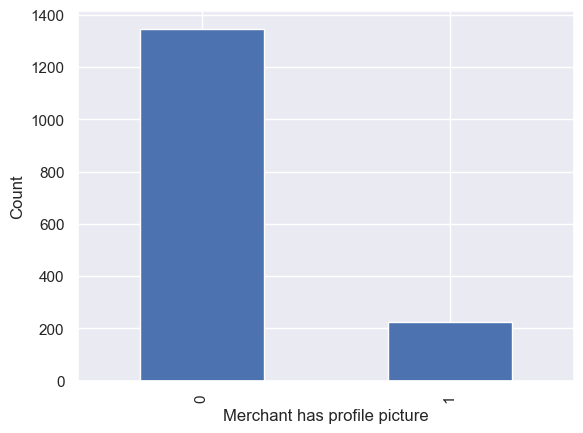

In [23]:
products.merchant_has_profile_picture.value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Merchant has profile picture')

In [55]:
products.groupby('merchant_has_profile_picture').agg({'rating': 'mean', 'rating_count': 'mean', 'units_sold': 'mean'})

,rating,rating_count,units_sold
merchant_has_profile_picture,,,
0,3.818241,763.403118,3789.100223
1,3.836726,1642.168142,7616.535398


In [24]:
has_picture = products.query('merchant_has_profile_picture == 1')
no_picture = products.query('merchant_has_profile_picture == 0')
print(has_picture.rating.std())
print(no_picture.rating.std())

0.3915937633775902
0.5334083474518977


In [25]:
ss.levene(has_picture.rating, no_picture.rating)

LeveneResult(statistic=10.083575474622295, pvalue=0.0015250056498016778)

/Users/miron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


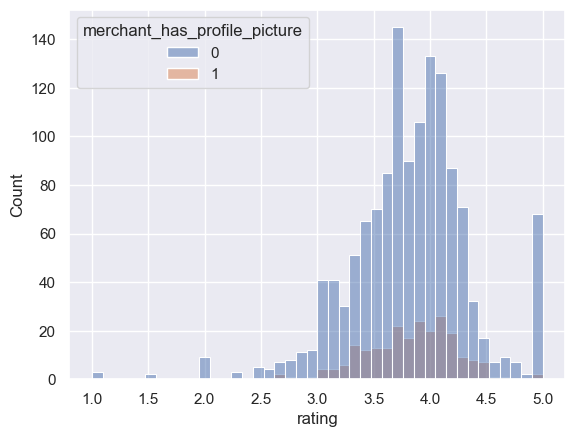

In [29]:

sns.histplot(x='rating', hue='merchant_has_profile_picture', data=products);

<h4>Variance of the rating scores among those who have profile picture and those who don't really differs. This means that rating scores of merchants that have profile picture tend to be centered around a certain value so they are kinda more "representative"<h4>

In [57]:
ss.ttest_ind(has_picture.rating, no_picture.rating, equal_var=False)

TtestResult(statistic=0.619710349052021, pvalue=0.5358191929935412, df=380.72561845126506)

<h4>There is no significant difference in rating score means of sellers who have profile picture and those who don't<h4>

<Axes: xlabel='merchant_rating', ylabel='rating'>

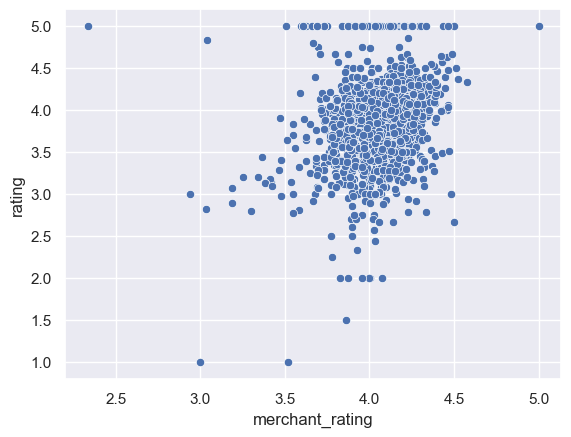

In [58]:
sns.scatterplot(x=products.merchant_rating, y=products.rating)

/Users/miron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Count'>

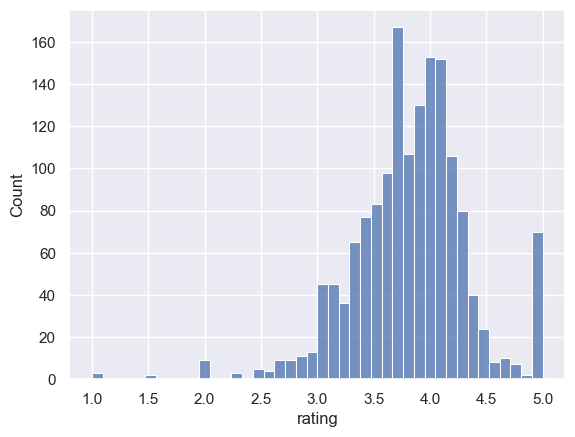

In [13]:
sns.histplot(products.rating)

In [14]:
ss.kstest(products.rating, 'norm')

KstestResult(statistic=0.9818489946009137, pvalue=0.0, statistic_location=2.44, statistic_sign=-1)

In [15]:
ss.shapiro(products.rating)

ShapiroResult(statistic=0.9572831392288208, pvalue=4.6237029406563094e-21)

<h4>Ratings follow normal distribution with a cluster products that have rating 5.0<h4>

In [59]:
less_5_ratings = products.query('rating < 5')

<Axes: xlabel='merchant_rating', ylabel='rating'>

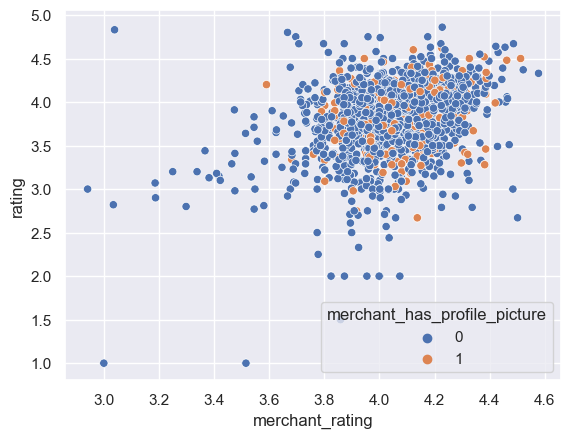

In [60]:
sns.scatterplot(x=less_5_ratings.merchant_rating, y=less_5_ratings.rating, hue=less_5_ratings.merchant_has_profile_picture)

In [61]:
ss.spearmanr(less_5_ratings.merchant_rating, less_5_ratings.rating)

SignificanceResult(statistic=0.29757310767947404, pvalue=4.1376133323097286e-32)

30% Correlation between a merchant rating and a rating the product

<Axes: xlabel='merchant_rating', ylabel='Count'>

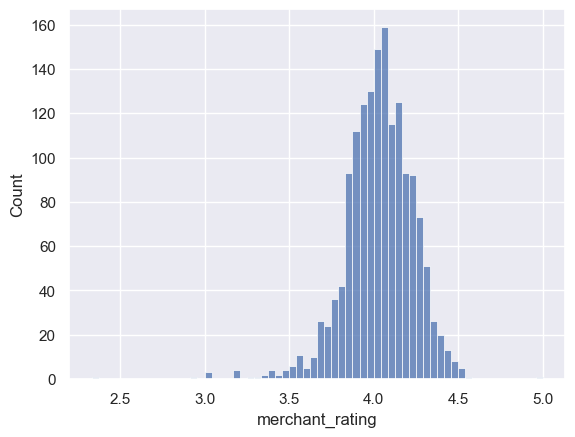

In [62]:
sns.histplot(products.merchant_rating)

In [12]:
ss.kstest(products.merchant_rating, 'norm')

KstestResult(statistic=0.997729431085198, pvalue=0.0, statistic_location=2.9411764705882355, statistic_sign=-1)

In [64]:
top_colors = products.product_color.value_counts().sort_values(ascending=False)[:10]
top_colors

product_color
black        302
white        254
yellow       105
blue          99
pink          99
red           93
green         90
grey          71
purple        53
armygreen     31
Name: count, dtype: int64

In [65]:
products[products.product_color.isin(top_colors.index.to_list())]\
.groupby('product_color').agg({'price': ['mean', 'std'], 'units_sold': ['mean', 'std']})

price             units_sold              
                   mean       std         mean           std
product_color                                               
armygreen      7.500323  2.846291  2377.451613   5186.358516
black          8.696457  3.706405  5239.447020   9967.148860
blue           8.451010  3.571479  3194.323232   6343.182081
green          7.808667  4.356994  3239.366667   7034.362475
grey           7.183521  3.089555  6143.521127  13827.749233
pink           7.828182  3.123915  2611.111111   4321.706931
purple         7.378113  3.232971  6386.415094  10719.737385
red            8.565591  3.753401  3164.516129   4890.105253
white          7.976142  3.572922  4418.216535   9025.092883
yellow         8.275524  3.836925  2116.304762   6074.245593

In [66]:
products.groupby('product_variation_inventory').units_sold.mean()

product_variation_inventory
1      1701.388158
2      3383.209877
3      1123.846154
4      1924.000000
5      1289.337838
6      7286.111111
7      4297.222222
8      2025.000000
9      3038.636364
10     4519.175000
11     6866.666667
12     6240.000000
13     4150.000000
14     5240.000000
15     4485.384615
16    10000.000000
17     2659.090909
18     6555.000000
19     6300.000000
20     2463.125000
21    12500.000000
22     1000.000000
23     5500.000000
24     1000.000000
25     6485.714286
26     2550.000000
27     5033.333333
28     5500.000000
29     3328.571429
30     2866.666667
31     3000.000000
33     1000.000000
34     7525.000000
35     3800.000000
36     2800.000000
37      550.000000
38    10050.000000
39    10050.000000
40      100.000000
41     4025.000000
43     2800.000000
44     3866.666667
45     3400.000000
46     1725.000000
47     4025.000000
48     5250.000000
49     5022.222222
50     5325.816979
Name: units_sold, dtype: float64

<Axes: xlabel='product_variation_inventory', ylabel='units_sold'>

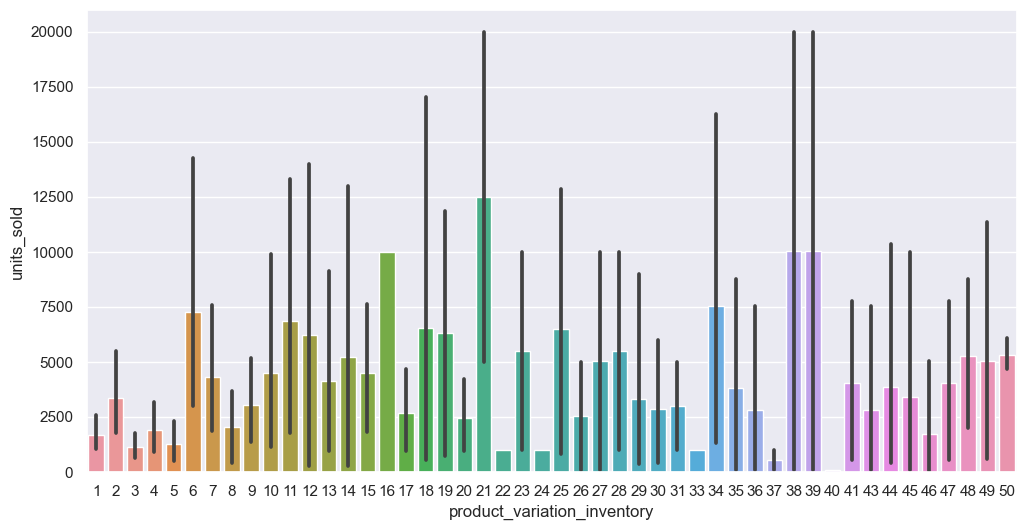

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(x='product_variation_inventory', y='units_sold', data=products)

In [68]:
bins = list(range(0,51, 5))
products['variation_categories'] = pd.cut(products.product_variation_inventory, bins=bins).sort_values(ascending=False)

<Axes: xlabel='variation_categories', ylabel='units_sold'>

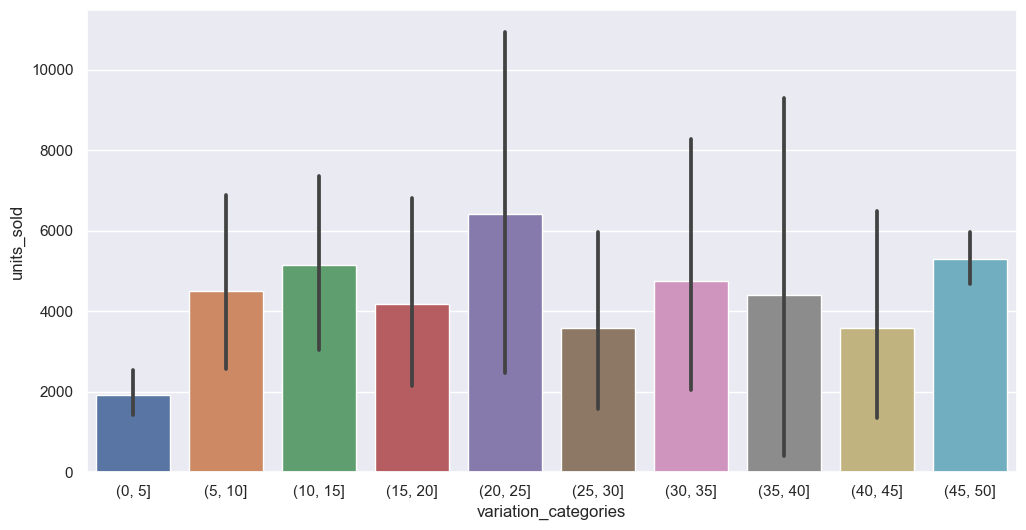

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(x='variation_categories', y='units_sold', errorbar='ci', data=products)

In [70]:
print(pairwise_tukeyhsd(products['units_sold'], groups=products['variation_categories']).summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj     lower      upper    reject
-----------------------------------------------------------------
  (0, 5]  (5, 10]  2589.5413 0.2551   -658.2029  5837.2854  False
  (0, 5] (10, 15]  3225.0821 0.5846  -1832.3348  8282.4989  False
  (0, 5] (15, 20]  2271.6406 0.8694  -2357.6128   6900.894  False
  (0, 5] (20, 25]  4502.3586 0.7832  -3783.0159 12787.7331  False
  (0, 5] (25, 30]   1671.974 0.9988  -5066.5418  8410.4897  False
  (0, 5] (30, 35]  2841.5194 0.9922  -6142.9156 11825.9544  False
  (0, 5] (35, 40]  2478.6406 0.9961  -6134.1826 11091.4639  False
  (0, 5] (40, 45]  1657.5622 0.9994  -5624.1966   8939.321  False
  (0, 5] (45, 50]  3380.7008    0.0   1598.5487   5162.853   True
 (5, 10] (10, 15]   635.5408    1.0  -4988.4707  6259.5523  False
 (5, 10] (15, 20]  -317.9006    1.0   -5560.231  4924.4297  False
 (5, 10] (20, 25]  1912.8173 0.9995  -6730.0683 10555.7029  False
 (5, 10] (

Range of 0..5 is better than 45..50

<Axes: xlabel='units_sold', ylabel='Count'>

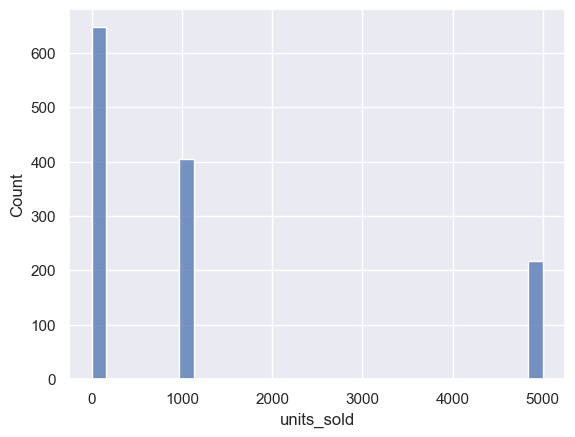

In [71]:
sns.histplot(products.units_sold[products.units_sold<10000])

In [72]:
products.units_sold.value_counts

<bound method IndexOpsMixin.value_counts of 0         100
1       20000
2         100
3        5000
4         100
        ...  
1568    10000
1569      100
1570      100
1571      100
1572      100
Name: units_sold, Length: 1573, dtype: int64>

In [73]:
products.uses_ad_boosts.value_counts()

uses_ad_boosts
0    892
1    681
Name: count, dtype: int64

In [78]:
use_ad_boost_stat = products.groupby('uses_ad_boosts').agg({'price': 'mean', 'units_sold': 'mean'})
use_ad_boost_stat

,price,units_sold
uses_ad_boosts,,
0,8.577018,4470.218610
1,7.995756,4167.136564


In [85]:
ss.ttest_ind(products.query('uses_ad_boosts == 0').price, products.query('uses_ad_boosts == 1').price)

TtestResult(statistic=2.911905039845833, pvalue=0.0036430140120634444, df=1571.0)

In [86]:
ss.ttest_ind(products.query('uses_ad_boosts == 0').units_sold, products.query('uses_ad_boosts == 1').units_sold)

TtestResult(statistic=0.6364354869040415, pvalue=0.5245853312335862, df=1571.0)

There is a significant difference between price among products that use ad boosts and that don't

<Axes: xlabel='uses_ad_boosts', ylabel='num_of_tags'>

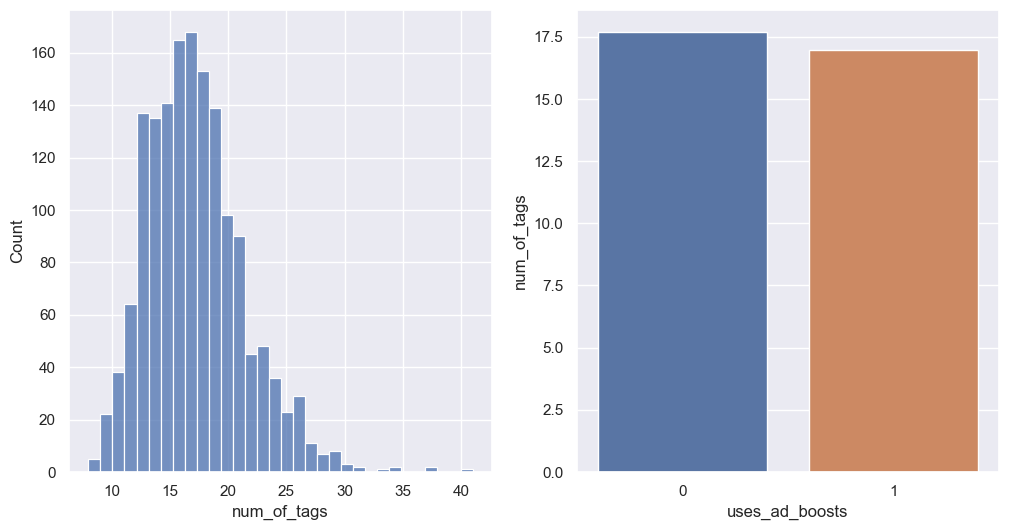

In [98]:
products['num_of_tags'] = products.tags.apply(lambda x: len(x.split(',')))
ad_boost_ovr_tags = products.groupby('uses_ad_boosts')['num_of_tags'].mean()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.histplot(products.num_of_tags, ax=axs[0])

sns.barplot(x=ad_boost_ovr_tags.index, y=ad_boost_ovr_tags, ax=axs[1])

In [99]:
products.num_of_tags.describe()

count    1573.000000
mean       17.390337
std         4.066115
min         8.000000
25%        14.000000
50%        17.000000
75%        20.000000
max        41.000000
Name: num_of_tags, dtype: float64

In [100]:
ss.ttest_ind(products.query('uses_ad_boosts == 0').num_of_tags, products.query('uses_ad_boosts == 0').num_of_tags)

TtestResult(statistic=0.0, pvalue=1.0, df=1782.0)

<h4>No difference between number of tags for product and whether product uses ad boosts or not<h4>

In [102]:
products.groupby('has_urgency_banner').agg({'price': 'mean', 'units_sold': 'mean'})

,price,units_sold
has_urgency_banner,,
1.0,8.198161,3998.219873


In [103]:
products.has_urgency_banner.value_counts

<bound method IndexOpsMixin.value_counts of 0       1.0
1       1.0
2       1.0
3       NaN
4       1.0
       ... 
1568    NaN
1569    1.0
1570    NaN
1571    NaN
1572    NaN
Name: has_urgency_banner, Length: 1573, dtype: float64>

In [106]:
products['has_urgency_banner'] = products['has_urgency_banner'].fillna(0)
products.has_urgency_banner.value_counts()

has_urgency_banner
0.0    1100
1.0     473
Name: count, dtype: int64

In [108]:
products.groupby('has_urgency_banner').agg({'price': 'mean', 'units_sold': 'mean', 'num_of_tags': 'mean'})

,price,units_sold,num_of_tags
has_urgency_banner,,,
0.0,8.380073,4485.542727,17.463636
1.0,8.198161,3998.219873,17.219873


In [110]:
ss.ttest_ind(products.query('has_urgency_banner == 0').price, products.query('has_urgency_banner == 1').price)

TtestResult(statistic=0.8413309349093149, pvalue=0.40029060678898687, df=1571.0)

In [114]:
ss.ttest_ind(products.query('has_urgency_banner == 0').units_sold, products.query('has_urgency_banner == 1').units_sold, equal_var=False)

TtestResult(statistic=0.969263489239581, pvalue=0.3326622187186513, df=943.1949564374733)